In [8]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [6]:
class BatsmanState(TypedDict):

    runs: int
    balls: int
    fours: int
    sixes: int
    
    sr: float
    bpb: float
    boundary_percent: float
    summary: str

    


In [17]:
def calculate_sr(state: BatsmanState):

    sr = (state['runs']/state['balls'])*100

    return {'sr':sr}

In [18]:
def calculate_bpb(state: BatsmanState) :

    bpb = state['balls']/(state['fours']+state['sixes'])

    return {'bpb':bpb}

In [19]:
def calculate_boundary_percent(state: BatsmanState) :

    boundary_percent = ((state['fours']*4 + state['sixes']*6)/state['runs'])*100

    return {'boundary_percent':boundary_percent}

In [28]:
def summary(state: BatsmanState):

    summary = f"""
    Strike Rate: {state['sr']:.2f} \n
    Balls Per Boundary: {state['bpb']:.2f} \n
    Boundary Percentage: {state['boundary_percent']:.2f} % 
    """


    return {'summary':summary}

In [25]:
graph = StateGraph(BatsmanState)

# add notes
graph.add_node('calculate_sr',calculate_sr)
graph.add_node('calculate_bpb',calculate_bpb)
graph.add_node('calculate_boundary_percent',calculate_boundary_percent)
graph.add_node('summary',summary)


# add Edges
graph.add_edge(START,'calculate_sr')
graph.add_edge(START,'calculate_bpb')
graph.add_edge(START,'calculate_boundary_percent')


graph.add_edge('calculate_sr','summary')
graph.add_edge('calculate_bpb','summary')
graph.add_edge('calculate_boundary_percent','summary')

graph.add_edge('summary',END)

# compile the graph
workflow = graph.compile()

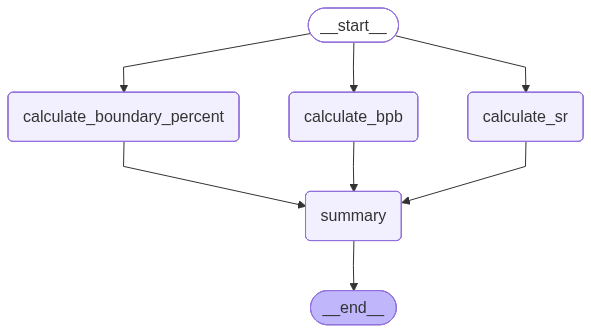

In [12]:
workflow

In [26]:
initial_state = {
    'runs':100,
    'balls':50,
    'fours': 6,
    'sixes': 4
}

final_state = workflow.invoke(initial_state)

In [27]:
final_state

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'sr': 200.0,
 'bpb': 5.0,
 'boundary_percent': 48.0,
 'summary': '\n    Strike Rate: 200.00 \n\n    Balls Per Boundary: 5.00 \n\n    Boundary Percentage: 48.00 % \n    '}